## Insurance Cost Prediction

Predicting insurance premium the individual has to make for his health insurance policy depending on health conditions and fitness triats

<img src="https://images.moneycontrol.com/static-mcnews/2018/10/health-insurance-form-1280x720.jpg?impolicy=website&width=1600&height=900" alt="insurance_img" width="720"/>


### Business Problem Statement:
Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals.

Leverage machine learning techniques, to predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

**Concepts Used:**

- Univariate,  Bivariate Analysis
- 2-sample t-test, Annova test, Chi-square test
- Linear Regression, Random Forest, XGBoost
- Cross Validation, Hyperparameter Tuning

### Data Overview
The dataset has the following attributes:
1.	**Age**: Numeric, range (18 to 66) years.
2.	**Diabetes**: Binary (0 or 1), where 1 indicates the presence of diabetes.
3.	**BloodPressureProblems**: Binary (0 or 1), indicating the presence of blood pressure-related issues.
4.	**AnyTransplants**: Binary (0 or 1), indicates the person has had a transplant.
5.	**AnyChronicDiseases**: Binary (0 or 1), indicating the presence of any chronic diseases.
6.	**Height**: Numeric, measured in centimeters, range (145 cm to 188 cm).
7.	**Weight**: Numeric, measured in kilograms, range (51 kg to 132 kg).
8.	**KnownAllergies**: Binary (0 or 1), indicates known allergies.
9.	**HistoryOfCancerInFamily**: Binary (0 or 1), indicating a family history of cancer.
10.	**NumberOfMajorSurgeries**: Numeric, counting the number of major surgeries, range 0 to 3.
11.	**PremiumPrice**: Numeric, premium price in currency, range (₹15,000 to ₹40,000).


In [3]:
import pandas as pd
import numpy as np

In [4]:
df_raw = pd.read_csv("insurance.csv")
df_raw

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [ ]:
# long from to work in tableau
# insurance_long = pd.melt(df_raw, id_vars=['SrNo'], value_vars=['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
#        'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'])
# insurance_long.to_excel('insurance_long.xlsx', index=False)

In [ ]:
df_raw.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
df_raw.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


- The dataset contains **986 rows and 11 columns**, with 4 numeric and 6 binary columns.    
- No significant skewness is observed in the numerical variables.  
- No missing values in the dataset
- The dataset size is relatively small, but it is sufficient for building an **end-to-end ML pipeline** including data exploration, preprocessing, hypothesis testing, and model development.

### Exploratory Data Analysis (EDA)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

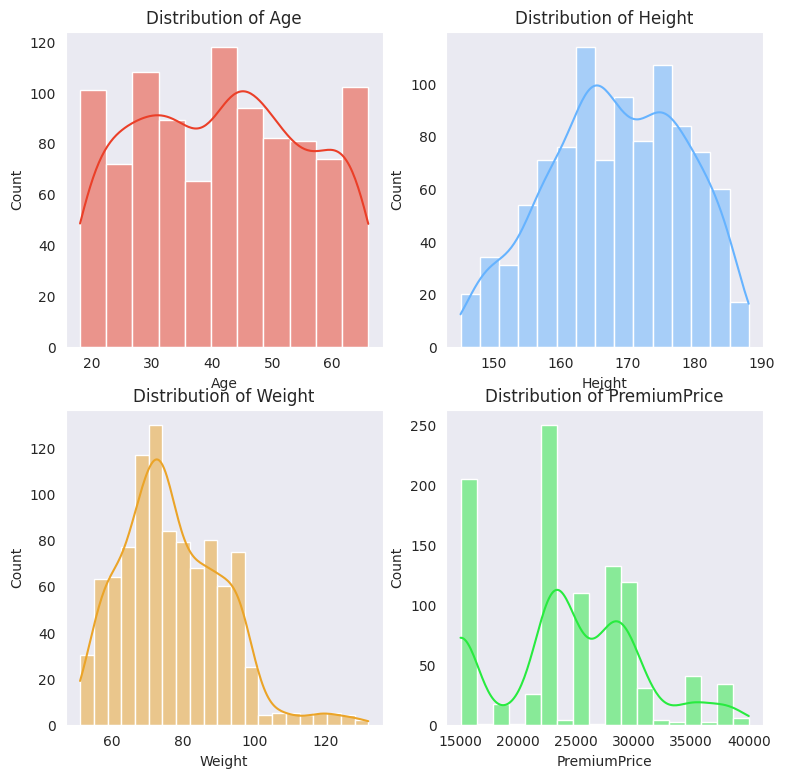

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(9,9))
axes = axes.flatten()
# print(axes)

cols = ['Age', 'Height', 'Weight', 'PremiumPrice']
for i, col in enumerate(cols):
    sns.histplot(data=df_raw, x=col, kde=True, ax=axes[i],
                 color=['#eb3f28', '#66b3ff', '#eba428', '#28eb3f'][i%4])
    axes[i].set_title(f'Distribution of {col}')
plt.show()

The bar plot shows
- **Age**: Almost uniform distribution, i.e. covers a wide range of customer profiles.
- **Height & Weight**: Height follows a normal distribution, while weight shows a slight right skew, indicates that a portion of customers are overweight, which may contribute to higher premiums.
- **Premium Price**: Irregular distribution with **two peaks**, suggesting the presence of atleast two distinct premium groups.  

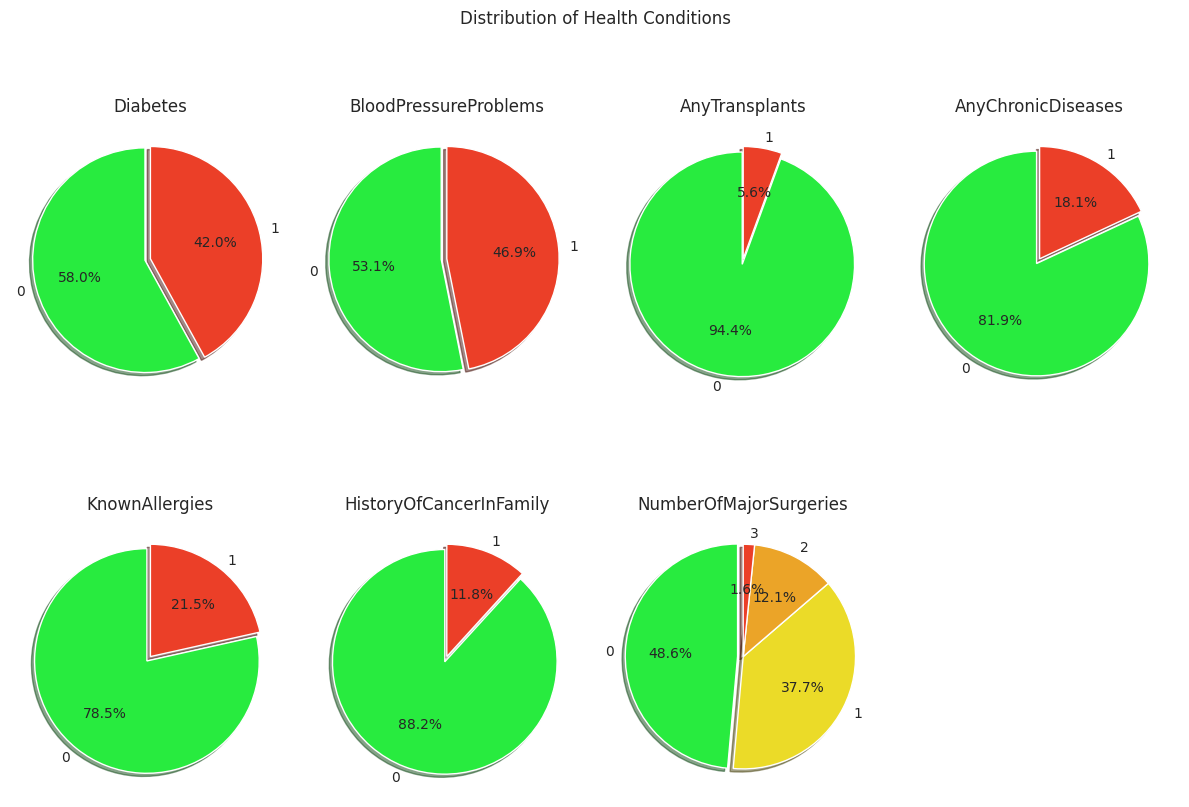

In [10]:
binary_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

fig, axes = plt.subplots(2, 4, figsize=(12, 9))
axes = axes.flatten()

colors = ['#28eb3f', '#eb3f28']  # Light green and red
explode = (0.05, 0)  # Slightly separate the slices

for i, col in enumerate(binary_cols):
  if col=="NumberOfMajorSurgeries":
    df_raw[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%',
                                    colors = ['#28eb3f', '#ebdb28', '#eba428', '#eb3f28'],
                                    explode = (0.05, 0, 0, 0), shadow=True,
                                    startangle=90, textprops={'fontsize': 10})
  else:
    df_raw[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%',
                                    colors=colors, explode=explode, shadow=True,
                                    startangle=90, textprops={'fontsize': 10})
  axes[i].set_title(f'{col}', fontsize=12, pad=5)
  axes[i].set_ylabel('')

# Hide the extra subplot
axes[7].set_visible(False)

fig.suptitle("Distribution of Health Conditions")
plt.tight_layout()
plt.show()

Pie chart show us the percentage of individuals for different health problems
- **Diabetes**: 42%  
- **Blood Pressure Problems**: 47%  
- **Transplants**: 5.6%
- **Chronic Diseases**: 18%  
- **Known Allergies**: 21.5%  
- **History of Cancer in Family**: 11%  
- **Major Surgeries**:  
  - 37% had one surgery
  - 12% had two surgeries  
  - 1.6% had three surgeries  

- A significant portion of customers (~40–50%) have **diabetes or blood pressure problems**, showing these are common health risks in the portfolio.  
- **Transplants (5.6%) and chronic diseases (18%)** are less frequent but more severe, likely driving higher premiums for those customers.  
- The **distribution of major surgeries** highlights that past medical history is common (with ~50% having at least one surgery), making it an important risk factor.


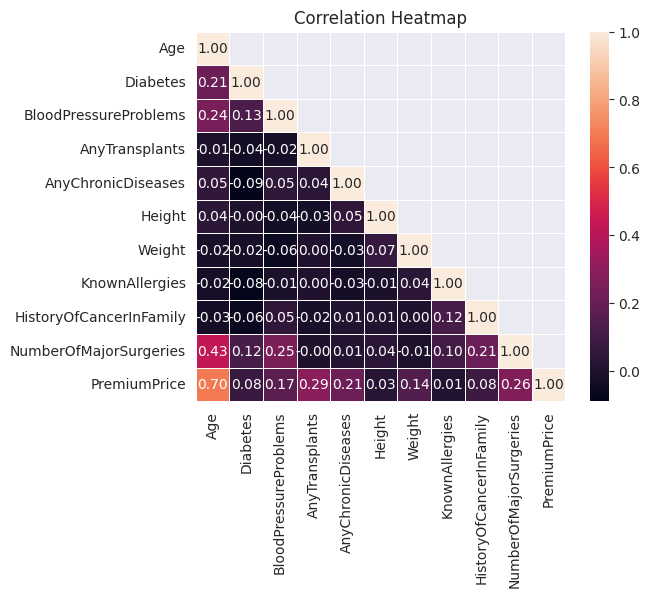

In [11]:
# Get correlation matrix and mask upper triangle
corr_matrix = df_raw.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=.5,
           square=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Correlation of Premium price with other independent varaibles
- **Premium Price** is:  
  - **Highly correlated** with **Age**, followed by **Transplants**, **Number of Major Surgeries**, and **Chronic Diseases**  
  - **Weakly correlated** with **Blood Pressure Problems** and **Height**
  - **Very weakly correlated** with **Diabetes** and **Family History of Cancer**  

- **Age** is the **strongest** driver of premium prices, age-based segmentation.  
- Rightly factor these **Medical history (transplants, surgeries, chronic diseases)** into pricing.  
- **Weaker correlations** (blood pressure, diabetes, family history of cancer) may be priced more conservatively or indirectly through other features.  

Correlation between features
- **Age** is **correlated** with **Number of Major Surgeries** and some correlation to **Diabetes** and **Blood Pressure Problems**
- **Blood Pressure Problems** and **Family History of Cancer** is correlated with **Number of Major Surgeries**
- **Height** shows little impact on premiums, while **weight’s** effect may emerge after deriving **BMI**.


In [6]:
# Calculate BMI
df_raw['bmi'] = df_raw['Weight'] / (df_raw['Height'] / 100) ** 2

# Create BMI categories using pd.cut
df_raw['bmi_category'] = pd.cut(df_raw['bmi'], bins=[0, 18.5, 25, 30, float('inf')],
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

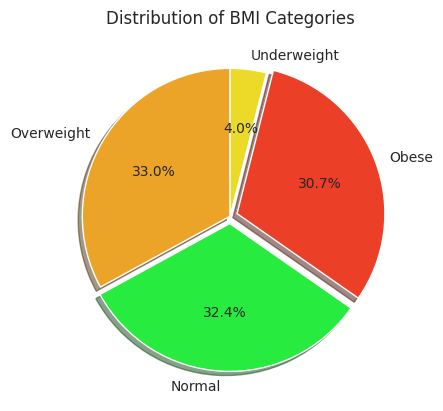

In [15]:
df_raw['bmi_category'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                    colors = ['#eba428', '#28eb3f', '#eb3f28','#ebdb28'],
                                    explode = (0., 0.05, 0.05, 0), shadow=True,
                                    startangle=90, textprops={'fontsize': 10})
plt.ylabel('')
plt.title('Distribution of BMI Categories')
plt.show()

BMI category Pie chart
- **32% are normal weight**, while **70% fall into unhealthy categories** (4% underweight, 33% overweight, 30% obese).  
- This shows that a large portion of policyholders have elevated health risks, which can justify higher premiums.  


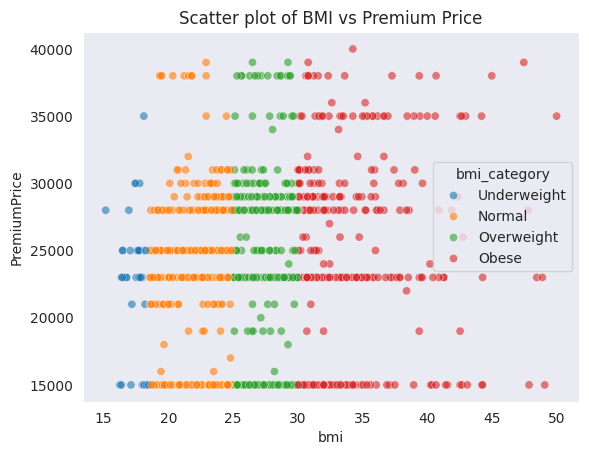

In [16]:
sns.scatterplot(data=df_raw, x='bmi', y='PremiumPrice',
                hue='bmi_category', alpha=0.6)
plt.title('Scatter plot of BMI vs Premium Price')
plt.show()

- The scatterplot confirms that **overweight and obese** policyholders dominate the higher premium ranges**, while normal/underweight policyholders are clustered at lower premium levels.  

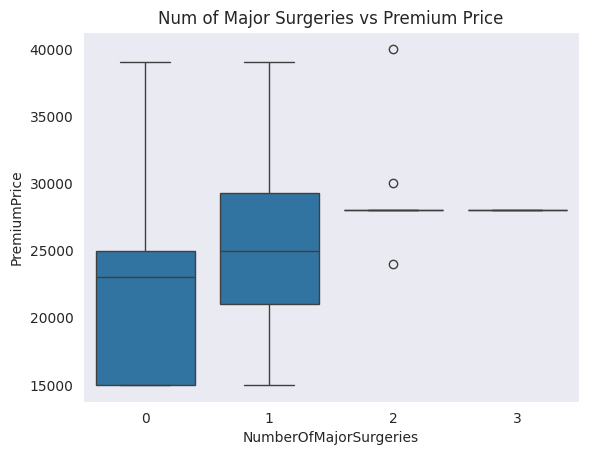

In [ ]:
sns.boxplot(data=df_raw, x='NumberOfMajorSurgeries', y='PremiumPrice')
plt.title("Num of Major Surgeries vs Premium Price")
plt.show()

Box Plot between Premium and No. of Surgeries
- Premiums rise with the **number of major surgeries**:  
  - **0 surgeries**: Median ~₹23,000, most values ≤ ₹25,000.  
  - **1 surgery**: Median ~₹25,000.  
  - **2–3 surgeries**: Median ~₹28,000, with several outliers (₹24K, ₹30K, ₹40K).  
- Very few policyholders have **2 or 3 surgeries**, but they consistently attract higher premiums, confirming medical history as a key driver of pricing.  


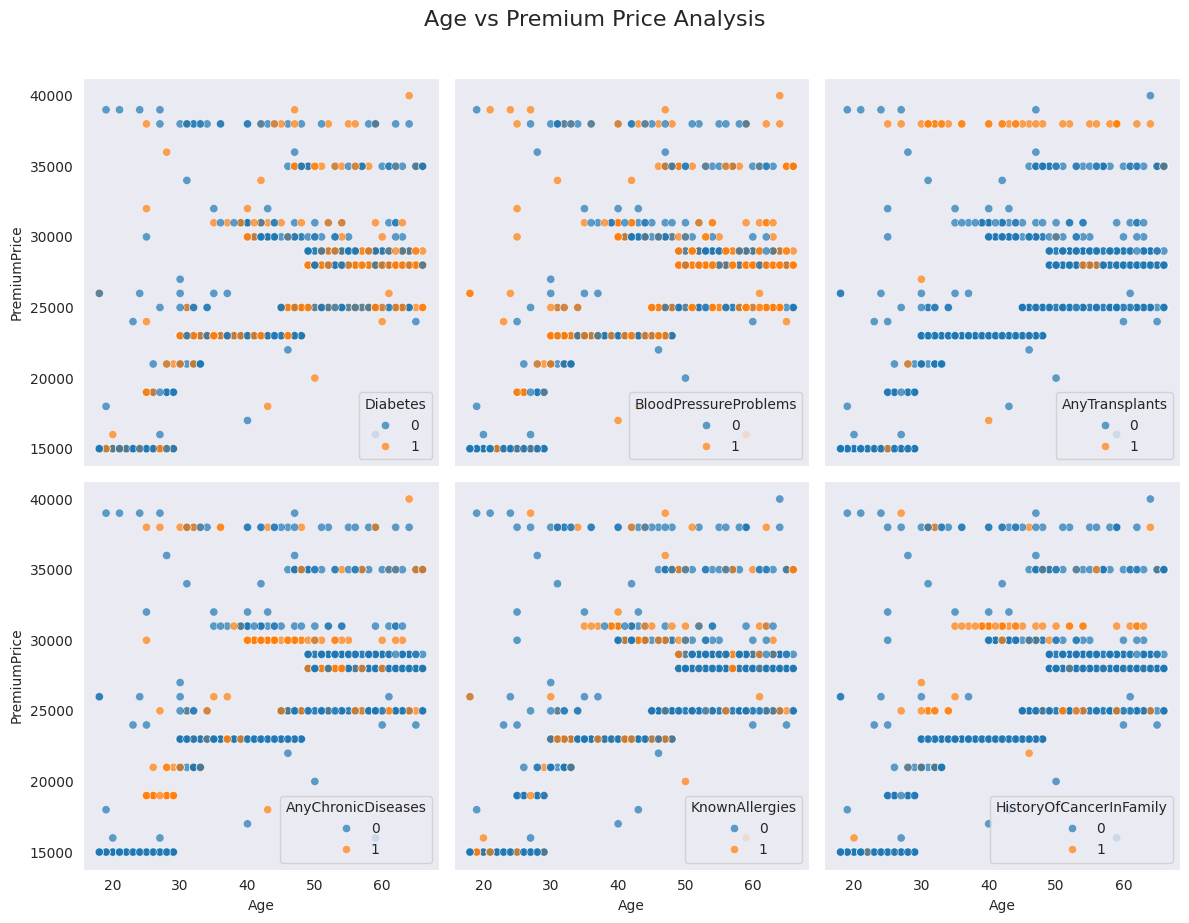

In [ ]:
hue_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
           'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

fig, axes = plt.subplots(2, 3, figsize=(12,9), sharex=True, sharey=True)
axes = axes.flatten()
# print(axes)

for i, col in enumerate(hue_cols):
    sns.scatterplot(data=df_raw, x='Age', y='PremiumPrice', hue=col,
                    ax=axes[i], alpha=0.7)
    # axes[i].set_title(f'{col}')

plt.suptitle('Age vs Premium Price Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Scatterplot betwen Premium and Age
- Overall, **premium price increases with age**, reaffirming the positive correlation  
- With health conditions as hue:  
  - **Diabetes**: Distribution is scattered, showing no distinct premium threshold  
  - **Blood Pressure Problems**: Premiums are generally above a **minimum price**, indicating insurers set a baseline risk  
  - **Transplants**: Concentrated around ₹38,000, highlighting very high premiums for this group  
  - **Chronic Diseases**: Clustered near ₹30,000, indicating elevated but lower premium than transplant cases  
  - **History of Cancer in Family**: Centered near ₹31,000, again showing consistent premium adjustments
  - **Known Allergies**: Distribution is scattered, suggesting weaker or indirect influence on premium pricing  


### Hypothesis Testing

#### 2 Sample T-test:
Assumptions:
1. Data values must be **independent**.
2. Data in each group must be obtained via a **random** sample from the population.
3. Data in each group are **normally distributed.**
4. Data values are **continuous**.
5. The **variances** for the two independent groups are equal.

**Null Hypothesis (H0):** Claim amount mean for claims approved is equal to claims not approved
$$ H_0: \mu_{premium-normal-condition} = \mu_{premium-not-normal-condition} $$

**Alternative Hypothesis (H1):** Claim amount mean for claims approved is not equal to claims not approved
$$H_1: \mu_{premium-normal-condition} < \mu_{premium-not-normal-condition} $$

Consider the significance level $\alpha = 0.05$.

**Levene test** to assess vairance in data:
- Null Hypothesis (H0): Variances of sample dataset are equal
- Alternate Hypothesis (Ha): Variances of sample dataset are not equal

**Shapiro-Wilk test** to assess normality of a data:
- Null Hypothesis (H0): Dataset sample follows normal distribution
- Alternate Hypothesis (Ha): Dataset sample does not follows normal distribution

In [17]:
from scipy.stats import levene, shapiro
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from statsmodels.graphics.gofplots import qqplot

In [ ]:
# ttest_ind??

> Any transplants

In [37]:
# transplant_premium = df_raw[df_raw['AnyTransplants'] == 1]['PremiumPrice']
# non_transplant_premium = df_raw[df_raw['AnyTransplants'] == 0]['PremiumPrice']

print(f"Premium price with Transplants: ₹{transplant_premium.mean().astype('int')}\n\
Premium price without Transplants: ₹{non_transplant_premium.mean().astype('int')}")

Premium price with Transplants: ₹31763
Premium price without Transplants: ₹23897


In [ ]:
levene(transplant_premium, non_transplant_premium)  # significant, variance not equal

LeveneResult(statistic=np.float64(8.93485569615894), pvalue=np.float64(0.002867336380270254))

`p_value < 0.05` for levene test, less than the significance level

We fail to **reject** the null hypothesis, **variance** of two groups `transplant_premium` and `non_transplant_premium` are not equal

In [ ]:
print(shapiro(transplant_premium))
print(shapiro(non_transplant_premium))  # significant, not normal distribution

ShapiroResult(statistic=np.float64(0.66320137824516), pvalue=np.float64(5.783799004810026e-10))
ShapiroResult(statistic=np.float64(0.9204216809709727), pvalue=np.float64(9.717455763577416e-22))


Premiums for transplants and non_transplants have `p_value < 0.05` in shapiro-wilk test, less than the significance level.

We **reject** the null hypothesis, both distributions does **not** follows **normal distribution**

The QQ plot below also shows that our data is not normally distributed

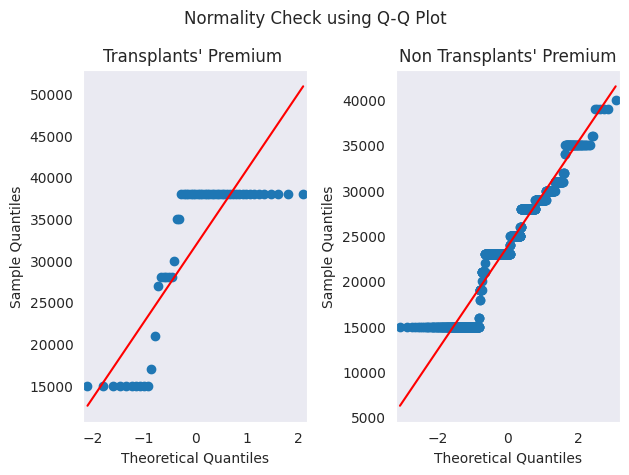

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

qqplot(transplant_premium, line="s", ax=ax1)
qqplot(non_transplant_premium, line="s", ax=ax2)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Transplants' Premium ")
ax2.set_title("Non Transplants' Premium")

plt.tight_layout()
plt.show()

In [ ]:
# left tailed test
t_stat, p_val = ttest_ind(non_transplant_premium, transplant_premium, alternative="less")

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: -9.472
P-value: 0.000


**Reject the Null Hypothesis:**
Since `p < 0.05` in independent t-test, less than the significance level.

The mean premium price for policy holders without any transplants done previously is **significantly less** than for holders with any transplants.

> History of Cancer in Family

In [38]:
cancerhistory_premium = df_raw[df_raw['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
non_cancerhistory_premium = df_raw[df_raw['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

print(f"Premium price with Cancer History in Family: ₹{cancerhistory_premium.mean().astype('int')}\n\
Premium price without Cancer History in Family: ₹{non_cancerhistory_premium.mean().astype('int')}")

Premium price with Cancer History in Family: ₹25758
Premium price without Cancer History in Family: ₹24147


In [ ]:
levene(cancerhistory_premium, non_cancerhistory_premium)  # significant, variance not equal

LeveneResult(statistic=np.float64(5.997899252289433), pvalue=np.float64(0.014496453126833982))

`p_value < 0.05` for levene test, less than the significance level

We fail to **reject** the null hypothesis, **variance** of two groups `cancerhistory_premium` and `non_cancerhistory_premium` are not equal

In [ ]:
print(shapiro(cancerhistory_premium))
print(shapiro(non_cancerhistory_premium))  # significant, not normal distribution

ShapiroResult(statistic=np.float64(0.8760470858571077), pvalue=np.float64(2.132109964796759e-08))
ShapiroResult(statistic=np.float64(0.9209550025128938), pvalue=np.float64(6.217231149394338e-21))


Premiums for cancer history and non cancer history have `p_value < 0.05` in shapiro-wilk test, less than the significance level.

We **reject** the null hypothesis, both distributions does **not** follows **normal distribution**

The QQ plot below also shows that our data is not normally distributed

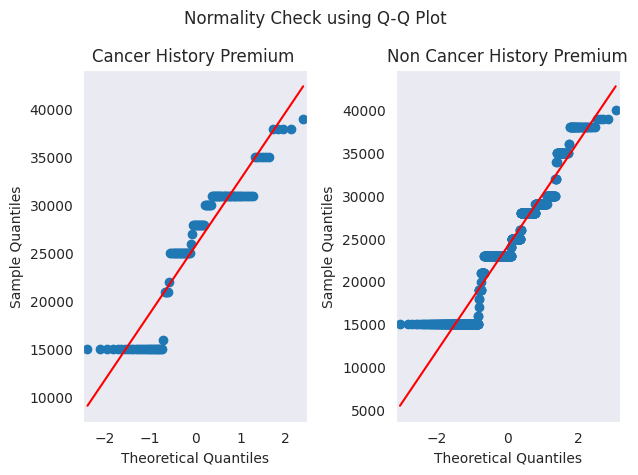

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

qqplot(cancerhistory_premium, line="s", ax=ax1)
qqplot(non_cancerhistory_premium, line="s", ax=ax2)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Cancer History Premium ")
ax2.set_title("Non Cancer History Premium")

plt.tight_layout()
plt.show()

In [ ]:
t_stat, p_val = ttest_ind(non_cancerhistory_premium, cancerhistory_premium, alternative="less")

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: -2.617
P-value: 0.005


**Reject the Null Hypothesis:**
Since `p < 0.05` in independent t-test, less than the significance level.

The mean premium price for policyholders without cancer history is **significantly less** than for cancer history in family.

> Any Chronic Disease

In [39]:
chronic_premium = df_raw[df_raw['AnyChronicDiseases'] == 1]['PremiumPrice']
non_chronic_premium = df_raw[df_raw['AnyChronicDiseases'] == 0]['PremiumPrice']

print(f"Premium price with Chronic Disease: ₹{chronic_premium.mean().astype('int')}\n\
Premium price without Chronic Disease: ₹{non_chronic_premium.mean().astype('int')}")

Premium price with Chronic Disease: ₹27112
Premium price without Chronic Disease: ₹23725


In [ ]:
levene(chronic_premium, non_chronic_premium)  # significant, variance not equal

LeveneResult(statistic=np.float64(6.508345857175313), pvalue=np.float64(0.01088728404011798))

`p_value < 0.05` for levene test, less than the significance level

We fail to **reject** the null hypothesis, **variance** of two groups `chronic_premium` and `non_chronic_premium` are not equal

In [ ]:
print(shapiro(chronic_premium))
print(shapiro(non_chronic_premium))  # significant, not normal distribution

ShapiroResult(statistic=np.float64(0.9402445392478758), pvalue=np.float64(9.100417476857392e-07))
ShapiroResult(statistic=np.float64(0.9095454463380589), pvalue=np.float64(1.6928145580704702e-21))


Premiums for chronic and nonchronic disease have `p_value < 0.05` in shapiro-wilk test, less than the significance level.

We **reject** the null hypothesis, both distributions does **not** follows **normal distribution**

The QQ plot below also shows that our data is not normally distributed

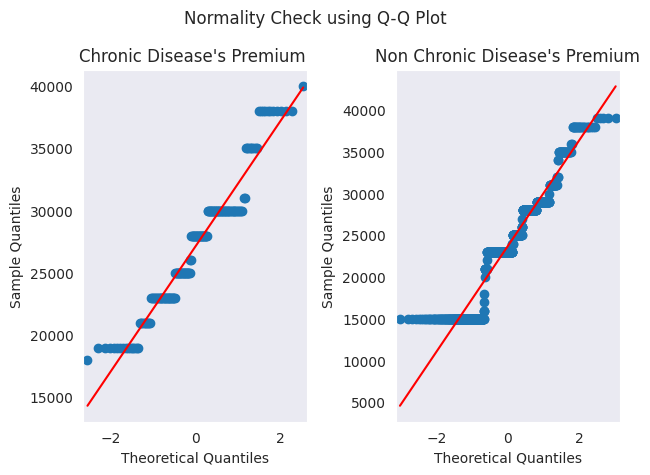

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

qqplot(chronic_premium, line="s", ax=ax1)
qqplot(non_chronic_premium, line="s", ax=ax2)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Chronic Disease's Premium ")
ax2.set_title("Non Chronic Disease's Premium")

plt.tight_layout()
plt.show()

In [ ]:
t_stat, p_val = ttest_ind(non_chronic_premium, chronic_premium, alternative="less")

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: -6.691
P-value: 0.000


**Reject the Null Hypothesis:**
Since `p < 0.05` in independent t-test, less than the significance level.

The mean premium price for policyholders without chronic disease (₹ 23,745) is **significantly less** than for chronic disease (₹ 27,112).

> Number of Major Surgeries

In [42]:
# zero_surgeries = df_raw[df_raw['NumberOfMajorSurgeries'] == 0]['PremiumPrice']
# one_surgery = df_raw[df_raw['NumberOfMajorSurgeries'] == 1]['PremiumPrice']
# two_surgeries = df_raw[df_raw['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
# three_surgeries = df_raw[df_raw['NumberOfMajorSurgeries'] == 3]['PremiumPrice']

print(f"Premium price with Zero major surgeries: ₹{zero_surgeries.mean().astype('int')}\n\
Premium price with One major surgery: ₹{one_surgery.mean().astype('int')}\n\
Premium price with Two major surgeries: ₹{two_surgeries.mean().astype('int')}\n\
Premium price with Three major surgeries: ₹{three_surgeries.mean().astype('int')}")

Premium price with Zero major surgeries: ₹22968
Premium price with One major surgery: ₹24741
Premium price with Two major surgeries: ₹28084
Premium price with Three major surgeries: ₹28000


In [ ]:
all_groups = levene(zero_surgeries, one_surgery, two_surgeries, three_surgeries)  # significant, variance not equal
print(all_groups)
group1 = levene(zero_surgeries, one_surgery)
print(group1)
group2 = levene(zero_surgeries, two_surgeries)
print(group2)
group3 = levene(zero_surgeries, three_surgeries)
print(group3)

LeveneResult(statistic=np.float64(57.30177805975256), pvalue=np.float64(3.877645981882467e-34))
LeveneResult(statistic=np.float64(3.9206889124580835), pvalue=np.float64(0.04801783227514535))
LeveneResult(statistic=np.float64(122.59433030319063), pvalue=np.float64(4.851730157424115e-26))
LeveneResult(statistic=np.float64(17.917982384484628), pvalue=np.float64(2.751427641698964e-05))


`p_value < 0.05` for levene test, less than the significance level

We fail to **reject** the null hypothesis, **variance** of all groups i.e. `zero_surgeries`, `one_surgery`, `two_surgeries` and `three_surgeries` are not equal

In [ ]:
df_raw['NumberOfMajorSurgeries'].value_counts()

,count
NumberOfMajorSurgeries,
0,479
1,372
2,119
3,16


In [ ]:
print(shapiro(zero_surgeries))
print(shapiro(one_surgery))
print(shapiro(two_surgeries))
print(shapiro(three_surgeries))

ShapiroResult(statistic=np.float64(0.8885394048976657), pvalue=np.float64(3.901965395277343e-18))
ShapiroResult(statistic=np.float64(0.930892659508563), pvalue=np.float64(4.194464670933881e-12))
ShapiroResult(statistic=np.float64(0.12415256176626321), pvalue=np.float64(1.8090482740166476e-23))
ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Premiums for different number of surgeries have `p_value < 0.05` in shapiro-wilk test, less than the significance level.

We **reject** the null hypothesis, for these distribution as they does **not** follows **normal distribution**.

For premium with three surgeries, the test is invalid, as all the values are same i.e. 28000. There is no varaince in data, as well its a uniform distribution  

The QQ plot below also shows that our data is not normally distributed

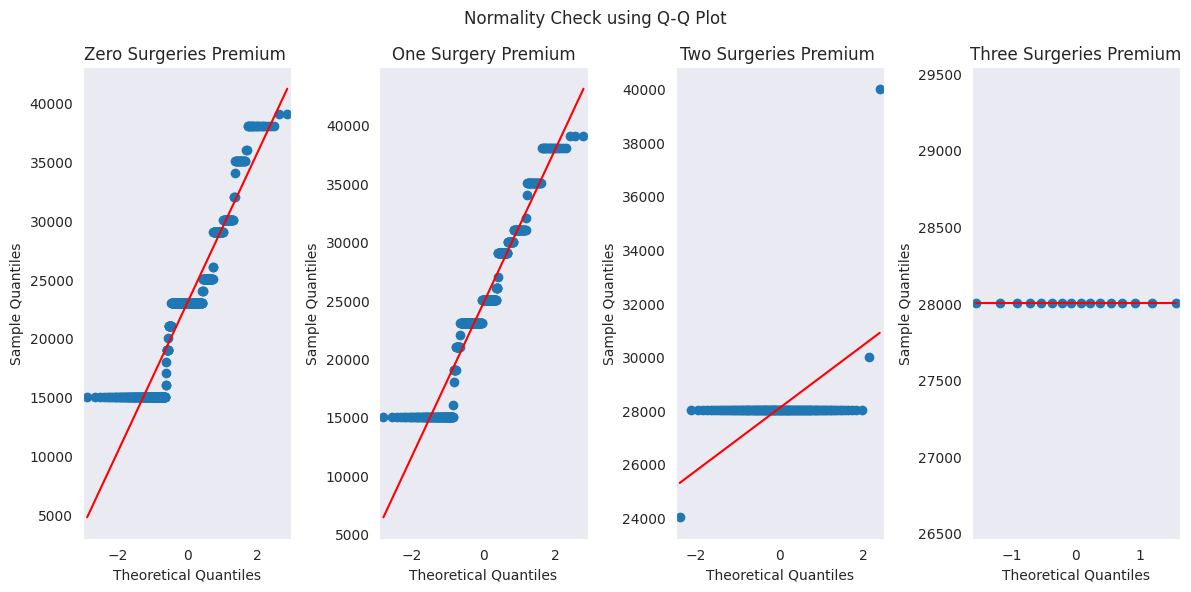

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,6))

qqplot(zero_surgeries, line="s", ax=ax1)
qqplot(one_surgery, line="s", ax=ax2)
qqplot(two_surgeries, line="s", ax=ax3)
qqplot(three_surgeries, line="s", ax=ax4)

plt.suptitle('Normality Check using Q-Q Plot')
ax1.set_title("Zero Surgeries Premium ")
ax2.set_title("One Surgery Premium")
ax3.set_title("Two Surgeries Premium ")
ax4.set_title("Three Surgeries Premium")

fig
plt.tight_layout()
plt.show()

In [ ]:
f_stat,p = f_oneway(zero_surgeries, one_surgery, two_surgeries, three_surgeries)
print(f'f_stat: {f_stat}, pval: {p}')

f_stat: 26.1353935974076, pval: 2.8711631377228097e-16


**Reject the Null Hypothesis:**
Since `p < 0.05` in f-oneway test, less than the significance level. Atleast one of the distribution is different

There is a **significant difference** in the **mean** premium price for different number of major surgeries

In [ ]:
# f_stat,p = f_oneway(zero_surgeries, one_surgery)
# print(f'f_stat: {f_stat}, pval: {p}')
# f_stat,p = f_oneway(zero_surgeries, two_surgeries)
# print(f'f_stat: {f_stat}, pval: {p}')
# f_stat,p = f_oneway(zero_surgeries, three_surgeries)
# print(f'f_stat: {f_stat}, pval: {p}')

t_stat, p_val = ttest_ind(zero_surgeries, one_surgery, alternative="less")
print(f'f_stat: {t_stat}, pval: {p_val}')
t_stat, p_val = ttest_ind(zero_surgeries, two_surgeries, alternative="less")
print(f'f_stat: {t_stat}, pval: {p_val}')
t_stat, p_val = ttest_ind(zero_surgeries, three_surgeries, alternative="less")
print(f'f_stat: {t_stat}, pval: {p_val}')

f_stat: -3.9710381855625196, pval: 3.8811947266795214e-05
f_stat: -8.735706055649748, pval: 1.2225156071123667e-17
f_stat: -3.1627551957491833, pval: 0.0008296020258039655


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


`p_value < 0.05` for the above cases in independent t-test
i.e. the mean premium price for policy holders without any major surgeries (₹ 22,968) is **significantly less** than for holders with any number of major surgeries (₹ 24,741, ₹ 28,084, ₹ 28,000 respectively for one, two and three major surgeries).

#### Chi-Square test
Assumption:
1. Each observation is independent of the others
2. The expected frequency for each category should be at least 5.
3. The data should be in the form of contingency table (counts or frequencies for different categories)
4. Sufficiently large sample size to ensure the validity

**Null Hypothesis (H0):** There is no association between different health conditions; the distribution of different health condition is independent
$$H_0: \text{health conditions are independent.}$$

**Alternative Hypothesis (H1):** There is an association between different health conditions;  the distribution of different health condition is dependent
$$H_1: \text{health conditions are dependent.}$$

Consider the significance level $\alpha = 0.05$.

In [ ]:
# use crosstab to contingency table
c_tab = pd.crosstab(df_raw['AnyChronicDiseases'], df_raw['HistoryOfCancerInFamily'])
c_tab

HistoryOfCancerInFamily,0,1
AnyChronicDiseases,,
0,714,94
1,156,22


Contigency table with expected frequecy for each category greater than 5, and assuming each observation in dataset is independent of each other. This satisfies the assumptions for chi-square test

In [ ]:
chi_stat, p, dof, exp_freq  = chi2_contingency(c_tab)
print("chi_stat:",chi_stat)
print("p_value:",p)
print("dof:",dof)
print("exp_freq:",exp_freq)  # statistically significant, assocation of smoker with claim approval

chi_stat: 0.02062393388215223
p_value: 0.8858081638149811
dof: 1
exp_freq: [[712.94117647  95.05882353]
 [157.05882353  20.94117647]]


**Fail to reject the Null Hypothesis:** Since the `p-value > 0.05`, higher than the significance level, we accept the null hypothesis.

There is **no significant association** between policy holders having **Chronic Diseases** and **History of Cancer in Family**. In other words, the distribution of Chronic diseases does not depend on Cancer history in the family.

In [44]:
c_tab1 = pd.crosstab(df_raw['Diabetes'], df_raw['bmi_category'])
c_tab1

bmi_category,Underweight,Normal,Overweight,Obese
Diabetes,,,,
0,27,180,183,182
1,12,139,142,121


In [ ]:
c_tab2 = pd.crosstab(df_raw['BloodPressureProblems'], df_raw['bmi_category'])
c_tab2

bmi_category,Underweight,Normal,Overweight,Obese
BloodPressureProblems,,,,
0,24,163,165,172
1,15,156,160,131


In [ ]:
chi_stat, p, dof, exp_freq  = chi2_contingency(c_tab1)
print("chi_stat:",chi_stat, "p_value:",p)
chi_stat, p, dof, exp_freq  = chi2_contingency(c_tab2)
print("chi_stat:",chi_stat, "p_value:",p)

chi_stat: 3.2568292712362537 p_value: 0.35369654408151346
chi_stat: 3.9724325743385656 p_value: 0.26445634177943217


**Fail to reject the Null Hypothesis:** Since the `p-value > 0.05`, higher than the significance level, we accept the null hypothesis.

There is **no significant association** between policy holders having **Diabetes** and **BMI Category**. In other words, the distribution of diabetes does not depend on BMI category.

Similarly, there is **no significant association** between policy holders having **Blood Pressure Problems** and **BMI Category**. In other words, the distribution of blood pressure problems does not depend on BMI category.

### Ordinary Least Squares (OLS) Method
OLS regression model minimizes the sum of the squares of the differences between the target and the independent variable. We'll add a constant term to account for the intercept.

This method helps in quantifying the relationship between demographics/health conditions and the premium price, while also testing the statistical significance of each predictor.

In [ ]:
from scipy import stats
import statsmodels.api as sm

In [ ]:
# Using statsmodels for hypothesis testing
X = df_raw.drop(['PremiumPrice', 'bmi_category'], axis=1)  # predictors
y = df_raw[['PremiumPrice']].copy()  # target

In [ ]:
X = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          4.07e-209
Time:                        07:17:12   Log-Likelihood:                -9508.3
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     974   BIC:                         1.910e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- **R-Squared** value of **0.64** is below being decent model, aroung 64% of the variation in premium prices is explained by the predictors.
- Lower **Adj. R-Square** value of **0.639** suggests, removing insignificant variables or trying transformations may improve adj. R².

- `Age, Any Transplants, Any Chronic Diseases, History of Cancer in Family, Number of Major Surgeries` are strong and statistically significant (p < 0.05).

- Applicants with transplants, chronic diseases, or family cancer history tend to have **higher premiums**, number of surgeries actually reduces the premium in this dataset.

- `Blood Pressure Problems, Height, Known Allergies, BMI` are **not** statistically significant. `Diabetes and Weight` are borderline(p ~ 0.08). This show little to no explanatory power.

### Machine Learning Modeling
**ML regression model** to predict **Premium price** from the (independent) input variables.
We'll apply **preprocessing techniques** (handling missing values, feature engineering, scaling, and encoding), followed by **training** and **tuning** models such as **Linear Regression, Random Forest, and XGBoost using cross-validation**."

> Handling Missing Values

Optionally performed for future cases when values are missing

- Drop rows, when the PremiumPrice is not given. Without Premium Price there is nothing to predict, adding synthetic values can miss lead the model  

- Use KNN Imputation for robust handling of missing numeric values

- Swap `zeros` when the binary column as missing values, we can assume that the Insurance holder is not having certain problem

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [8]:
df_prep = df_raw.copy()
df_prep = df_prep.dropna(subset=['PremiumPrice'])

In [ ]:
binary_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
               'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
df_prep[binary_cols] = df_prep[binary_cols].fillna(0)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
numeric_cols = ['Age', 'Height', 'Weight']
df_prep[numeric_cols] = knn_imputer.fit_transform(df_prep[numeric_cols])

In [ ]:
# df_prep.describe()
# df_prep.info()

> Feature Engineering

- We have created `BMI` and `BMI category` using height and weight previously
- Derive a `Health risk score` as addition of all the health conditions of the policy holder
- Derive a `High risk score` as addition of the relevant/significant health conditions for monitoring premium price


In [9]:
df_prep['health_risk_score'] = (df_prep['Diabetes'] + df_prep['BloodPressureProblems'] +
                               df_prep['AnyTransplants'] + df_prep['AnyChronicDiseases'] +
                               df_prep['KnownAllergies'] + df_prep['HistoryOfCancerInFamily'])

In [ ]:
df_prep['health_risk_score'].value_counts()

,count
health_risk_score,
1,350
2,313
0,176
3,128
4,18
5,1


In [10]:
# significant varaibles, that indicate high risk profile
df_prep['high_risk_score'] = (df_prep['AnyTransplants'] + df_prep['AnyChronicDiseases'] +
                             df_prep['HistoryOfCancerInFamily'] + df_prep['NumberOfMajorSurgeries'])

In [ ]:
df_prep['high_risk_score'].value_counts()

,count
high_risk_score,
0,377
1,300
2,227
3,75
4,7


> Scaling and Encoding

- We'll keep the binary health condition is the same state (equivalent to label encoding)
- Encode bmi category as ordinal feature
- Apply StandardScaler on numeric features
- Save the fitted scaler as a pickle file to ensure the same transformation is applied on test data or new inputs

In [11]:
bmi_order = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_prep['bmi_category'] = df_prep['bmi_category'].map(bmi_order)

In [12]:
scaler = StandardScaler()
numeric_cols = ['Age', 'Height', 'Weight', 'bmi']
df_prep[numeric_cols] = scaler.fit_transform(df_prep[numeric_cols])

In [ ]:
# dump scaler artifact for preprocessing during test/prediction on new data
import joblib
joblib.dump(scaler, 'scaler_transform.pkl')

In [ ]:
# df_prep
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    float64 
 1   Diabetes                 986 non-null    int64   
 2   BloodPressureProblems    986 non-null    int64   
 3   AnyTransplants           986 non-null    int64   
 4   AnyChronicDiseases       986 non-null    int64   
 5   Height                   986 non-null    float64 
 6   Weight                   986 non-null    float64 
 7   KnownAllergies           986 non-null    int64   
 8   HistoryOfCancerInFamily  986 non-null    int64   
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
 11  bmi                      986 non-null    float64 
 12  bmi_category             986 non-null    category
 13  health_risk_score        986 non-null    int64   
 14  high_risk_

In [13]:
X = df_prep.drop(columns=['PremiumPrice'])
y = df_prep.PremiumPrice.copy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Regression model
- We'll apply **Linear Regression, Random Forest Regression, and XGBoost** to predict premium prices using input features

- Use metrics like **R-Square and Adj. R-Square** to evaluate model performance, this calculates variance explained by the model

- Analyse **feature importance** to identify the most influential factors driving premium prices

- Check **assumptions** of Linear Regression by testing the **normality of residuals and homoscedasticity**

- **Save** the best-performing model to **deploy** via FastAPI to predict premium prices in a live application

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             root_mean_squared_error, r2_score)

In [16]:
# define adjusted r2 score
def adj_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linreg = model.predict(X_test)

print("r2_score:", r2_score(y_test, y_pred_linreg))
print("adj_r2_score:", adj_r2_score(y_test, y_pred_linreg, len(X_train.columns)))  # this suggest, unnecessary feature
print("RMSE:", root_mean_squared_error(y_test, y_pred_linreg))

r2_score: 0.7085336267305504
adj_r2_score: 0.6862356528192264
RMSE: 3525.4701530026186


In [ ]:
feature_weights = pd.Series(model.coef_, index=X_train.columns).sort_values(ascending=False)
print(feature_weights)

AnyTransplants             4829.691349
Age                        4549.766343
high_risk_score            1692.676167
bmi_category               1048.531235
health_risk_score           989.076799
Weight                      528.390808
Height                      299.080387
AnyChronicDiseases         -139.404514
bmi                        -274.977648
HistoryOfCancerInFamily    -599.211913
KnownAllergies             -846.961861
BloodPressureProblems      -853.477413
Diabetes                  -1401.558848
NumberOfMajorSurgeries    -2398.398754
dtype: float64


- Model achieved a **R2** of **0.71**, meaning that ~71% of the variation in premium price is explained by the predictors, decent model. The Adjusted R2 of **0.69** is slightly lower, reflecting some predictors may not add much explanation

- The model indicates that `Transplants, Age, High risk scores, Major surgeries, and Diabetes` are the top 5 most influential variables in determining premium prices
- While three have positive effect with premium price, the increase in Major surgeries and Diabetes have negative effect, reducing premium price
- Transplant and Age are the strongest predictors, other have small but significant importance in predicting premium price


In [20]:
model = RandomForestRegressor(max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

print("r2_score:", r2_score(y_test, y_pred_rf))
print("adj_r2_score:", adj_r2_score(y_test, y_pred_rf, len(X_train.columns)))  # this suggest, unnecessary feature
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

r2_score: 0.8644388812326874
adj_r2_score: 0.8540680852614175
RMSE: 2404.309574521237


In [ ]:
feature_weights = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_weights)

Age                        0.680340
AnyTransplants             0.111820
Weight                     0.057587
bmi                        0.034231
AnyChronicDiseases         0.031403
NumberOfMajorSurgeries     0.022781
HistoryOfCancerInFamily    0.017099
Height                     0.015441
high_risk_score            0.013160
BloodPressureProblems      0.006629
health_risk_score          0.005653
bmi_category               0.001905
Diabetes                   0.001616
KnownAllergies             0.000335
dtype: float64


- Model achieved an **R2** of **0.86**, meaning that ~86% of the variation in premium price is explained by the predictors, showing a strong fit. The **Adjusted R2** of **0.85** is slightly lower but still indicates excellent explanatory power.

- The model highlights `Age, Transplants, Weight, BMI, and Chronic diseases` as the top 5 most influential variables in predicting premium prices.

- Among these, Age alone accounts for the majority of predictive power (68%), making it the dominant driver of premiums, followed by Transplants (~11%). Other features such as Weight, BMI, and Chronic Diseases contribute moderately.

- Compared to linear regression, Random Forest captures **non-linear** relationships and interactions more effectively, leading to a much **higher R2** and better predictive performance.

In [ ]:
# save model for inference/ predicting premium price
import joblib
joblib.dump(model, 'cost_pred_rf.pkl')

['cost_pred_rf.pkl']

> Test assumptions of Linear Regression Models

1. Normality of Residuals
2. Homoscedasticity of Residuals (Equal variance)

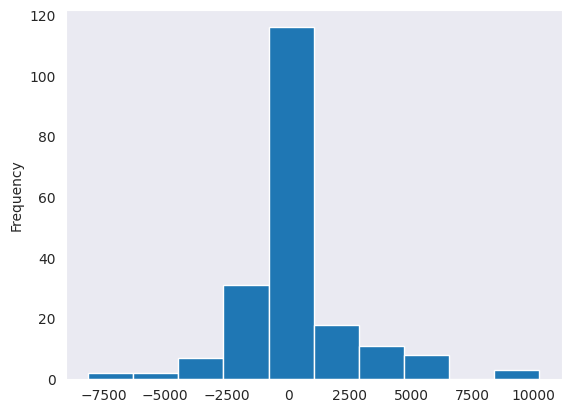

In [ ]:
residuals = y_test - y_pred_rf
residuals.plot.hist()
plt.show()  # normal residuals

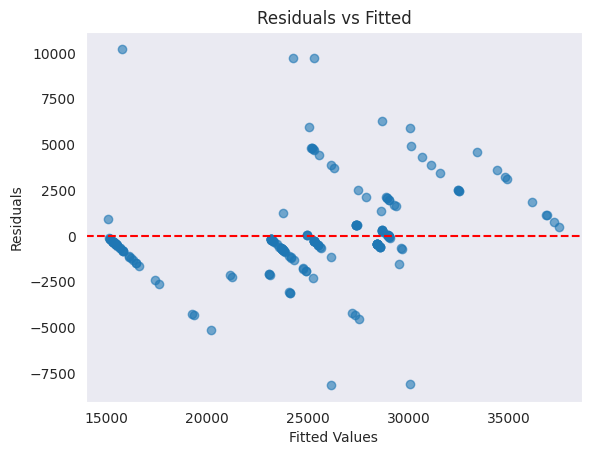

In [ ]:
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

- The errors or residuals (the difference between predicted and actual values) are **normally distributed** with mean close to **zero**. This indicates that the model’s predictions are, on average, correct and unbiased

- The **variance** of residuals remains roughly **constant** across different levels of the independent variables, even though values are diverging from about **–7500 to 10000**.Suggests **homoscedasticity** meaning the model performs consistently across both low and high premium price ranges

In [26]:
!pip install xgboost-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.1 MB/s eta 0:00:00


In [27]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.05,
                         enable_categorical=True)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [34]:
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

print("r2_score:", r2_score(y_test, y_pred_xgb))
print("adj_r2_score:", adj_r2_score(y_test, y_pred_xgb, len(X_train.columns)))  # this suggest, unnecessary feature
print("RMSE:", root_mean_squared_error(y_test, y_pred_xgb))

r2_score: 0.8511841893196106
adj_r2_score: 0.8397993732019852
RMSE: 2519.111328125


In [36]:
feature_weights = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_weights)

AnyTransplants             0.369558
Age                        0.217033
HistoryOfCancerInFamily    0.099266
AnyChronicDiseases         0.070319
NumberOfMajorSurgeries     0.063229
Weight                     0.046990
Diabetes                   0.030903
bmi                        0.030395
high_risk_score            0.025718
Height                     0.016367
health_risk_score          0.015566
BloodPressureProblems      0.008009
KnownAllergies             0.003892
bmi_category               0.002755
dtype: float32


- XGBoost Regression achieved an R2 of 0.85 (Adj. R2 = 0.84), the model fits almost as well as Random Forest but with more flexibility in capturing complex non-linear relationships.

- The model highlights `Age, Transplants, History of Cancer in family, Chronic diseases, No. of major Surgeries` as the top 5 most influential variables in predicting premium prices. This aligns better with correlation heatmap

- Here, Transplants act as a major influential feature (37%), followed by Age(22%) these together make upto 58% predictive power to predict Premium price. Features such as Family history of Cancer, Chronic diseases, and No. of major Surgeries contribute effectively.

In [37]:
# save model for inference/ predicting premium price
import joblib
joblib.dump(model, 'cost_pred_xgb.pkl')

['cost_pred_xgb.pkl']

> Small Feature Set

After evaluating variable importance, we'll exclude less informative features (Height, Weight, KnownAllergies, BMI) from the model input. This reduced feature set improves interpretability and efficiency

In [22]:
X_train_small = X_train.drop(columns=["Height", "Weight", "KnownAllergies", "bmi"])
X_test_small = X_test.drop(columns=["Height", "Weight", "KnownAllergies", "bmi"])

In [23]:
model = RandomForestRegressor(max_depth=6, random_state=1)
model.fit(X_train_small, y_train)
y_pred_rf = model.predict(X_test_small)

print("r2_score:", r2_score(y_test, y_pred_rf))
print("adj_r2_score:", adj_r2_score(y_test, y_pred_rf, len(X_train_small.columns)))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

r2_score: 0.8507474456605336
adj_r2_score: 0.8427660256423803
RMSE: 2522.8050981563906


In [ ]:
model2 = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.05,
                         enable_categorical=True)
model2.fit(X_train_small, y_train)
y_pred_xgb = model2.predict(X_test_small)

print("r2_score:", r2_score(y_test, y_pred_xgb))
print("adj_r2_score:", adj_r2_score(y_test, y_pred_xgb, len(X_train_small.columns)))
print("RMSE:", root_mean_squared_error(y_test, y_pred_xgb))

r2_score: 0.8490970730781555
adj_r2_score: 0.8410273978416932
RMSE: 2536.71484375


- Random Forest Regression (max_depth = 6) R2 of 0.85 and Adj. R2 of 0.84, performs 1% less compared to the earlier random forest model with all features and depth 5, even with less feature interactions model captures premium price without significant overfitting.

- XGBoost Regression (max_depth = 4) produced R2 of 0.85 and better Adj. R2 of 0.84, compared to earlier XGBoost model with all features in. The slightly shallower depth (4 vs. 5 previously) suggests the model is generalizing better by avoiding unnecessary complexity.

- Streamlining features has not hurt accuracy but has made the models leaner and more interpretable, which is beneficial for deployment.

#### Cross Validation
We'll perform Cross-validation using `cross_val_score` with 5 folds, providing a more reliable estimate of model performance by training on different subsets of the data and averaging the R2 scores across folds.

In [24]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(max_depth=5, random_state=1)
# model.fit(X_train, y_train)
cv_scores = cross_val_score(rf_model, X_train, y_train,
                            cv=5,
                            scoring='r2')  # or 'neg_root_mean_squared_error'

print("R2 Scores:", cv_scores)
print("Mean R2:", cv_scores.mean())

R2 Scores: [0.73017413 0.71342248 0.55207422 0.74668943 0.80254191]
Mean R2: 0.7089804356319619


In [32]:
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.05,
                         enable_categorical=True)
cv_scores = cross_val_score(xgb_model, X_train, y_train,
                            cv=5, scoring='r2')  # or 'neg_root_mean_squared_error'

print("R2 Scores:", cv_scores)
print("Mean R2:", cv_scores.mean())

R2 Scores: [0.705033   0.70516264 0.51198149 0.77685392 0.8082034 ]
Mean R2: 0.7014468908309937


- Random Forest (max_depth=5) The 5-fold cross-validation R2 scores ranged between 0.55 and 0.80, with a mean R2 of 0.71. Model performs well but has high variability across folds, meaning its performance depends data subset used for training.

- XGBoost (max_depth=5, learning_rate=0.05) R2 scores ranged between 0.51 and 0.81, with a mean R2 of 0.70. Again, variability is high, and the average performance is lower than the above trained models.

- Both models performed worse under cross-validation compared to the initial single train-test split evaluation. This suggests that the earlier results may have been somewhat optimistic.

- Cross-validation gives a more realistic estimate of generalization than a single split. True model performance is closer to 0.70–0.72 R2, not the 0.85 from the earlier split
- Or it might be due to small subset of data  or data with unusual distribution especially in third subset, where the target variable premium price might had outliers or rare cases

#### Hyperparameter tuning

In [33]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 125, 150],
    'max_depth': [7, 10, 12],
    'max_features': ["sqrt", "log2", None],
    "min_samples_split": [8, 10, 15]
}

rf_model = RandomForestRegressor(random_state=1)

random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=20,
    scoring='r2', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 125, 'min_samples_split': 10, 'max_features': None, 'max_depth': 10}
Best CV R2 Score: 0.7460047162126052


In [30]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.055, 0.06],
    'subsample': [0.85, 0.9, 0.95],
    'colsample_bytree': [0.8, 0.85, 0.9]
}

xgb_reg = xgb.XGBRegressor(random_state=42, enable_categorical=True)

random_search = RandomizedSearchCV(
    xgb_reg, param_distributions=param_dist, n_iter=20,
    scoring='r2', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV R2 Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.95, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
Best CV R2 Score: 0.7296710133552551


- **Random Forest**: Best parameters (`n_estimators=125, min_samples_split=10, max_features=None, max_depth=10`) achieved a Best CV R2 of 0.75, which is lower than the earlier single train–test performance of 0.86

- **XGBoost**: Best parameters (`subsample=0.95, n_estimators=300, max_depth=4, learning_rate=0.05, colsample_bytree=0.9`) achieved a Best CV R2 of 0.73, also underperforming compared to earlier results (~0.85 R2)

- **Hyperparameter tuning** did **not** lead to **performance gains** beyond the initial models. This is likely due to the **limited dataset** size (~640 records due to cross validation), where model variance is high and further tuning cannot extract additional information required to device pattern to predict

### Summary

**Key Insights from Data Analysis**

- Premium Price showed an irregular distribution with multiple peaks, suggesting **distinct premium groups**

- **Strongest** drivers of Premium Price: are Age, Transplants, Number of Major Surgeries, and Chronic Diseases
- **Weak/Very Weak relationships:** Blood Pressure Problems, Height, Diabetes, and Family History of Cancer
- **Other relationships:** Age linked with Major Surgeries and moderately with Diabetes & Blood Pressure Problems. Blood Pressure Problems & Cancer History linked with Major Surgeries
- **BMI & Premiums:** 70% policyholders were overweight/obese, at higher premium ranges

**Statistical Tests**

* **Two-Sample t-test:**
  * Premiums significantly higher for those with **Transplants (\~₹31,763)**, **Chronic Diseases (\~₹27,112)**, and **Cancer History (\~₹25,758)** compared to those without
* **ANOVA:**
  * Premiums increased significantly with **number of major surgeries** (\~₹28,000 for 2-3 surgeries)
* **Chi-Square Test:**
  * No significant association between **chronic diseases and cancer history**, or between **BMI and Diabetes/Blood Pressure Problems**

**Machine Learning Models**

* **Random Forest:**
  * Top 5 Features: **Age, Transplants, Weight, BMI, Chronic Diseases**
  * R2: **0.86** | **0.75 (CV after tuning)**

* **XGBoost:**
  * Top 5 Features: **Age, Transplants, Cancer History, Chronic Diseases, Major Surgeries**
  * R2: **0.85** | **0.73 (CV after tuning)**
* Both models showed **good predictive power** with random forest performing better. Age and Transplants consistently emerging as key factors



### Recommendations

- **Age-based Pricing:** Premiums should rise progressively with age since it is the strongest predictor. Create clear premium bands by age groups (e.g., 20–35, 36–50, 51–65)

- **High-Risk Medical History:** Apply premium loadings (additional costs)
  - Policyholders with **transplants** or **multiple surgeries** must be priced at a premium due to significantly higher costs.  
  - **Chronic diseases** and **family cancer history** should be factored as mid-tier risk multipliers.  
- Age-related increase in **diabetes, blood pressure, and surgeries** amplifies risk; premiums should account for these clusters.

- **BMI Consideration:** Policyholders in the **normal BMI category** should be incentivized with lower premiums, while overweight/obese groups should face higher premiums due to increased likelihood of other health complications.  

- Offer **dynamic pricing**: Policyholders can lower premiums by enrolling in wellness programs, preventive check-ups, or fitness challenges.

- **Model Deployment:** For long-term scaling, start with **Random Forest** for transparency, then move toward **XGBoost** for efficient scaling in real-world applications.

- **Risk Management Advantage**: More granular pricing ensures you are not **underpricing high-risk customers** (which increases claim payouts) or **overpricing low-risk customers** (which pushes them to competitors).  
- Improves profitability while staying attractive to healthy customer segments.

### Future Work  
- Explore ensemble methods like **stacking** to build more sophisticated models and enable granular pricing strategies  
- Deploy ML models for **real-time premium prediction** on new input data through APIs
- Implement **model monitoring** to track performance over time and detect **data drift**, ensuring stable and reliable predictions in production
